In [99]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [100]:
a = pd.read_csv("ethylene_CO2s.csv")

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
a.iloc[:,3:] = scaler.fit_transform(a.iloc[:,3:])

In [102]:
for i in range(1,17):
    a[f"d{i}"] = 0
for i in range(1,17):
    a[f"d{i}"][1:] = (a.iloc[1:,2+i].reset_index(drop=True) - a.iloc[0:-1,2+i].reset_index(drop=True))/(a.iloc[1:,0].reset_index(drop=True) - a.iloc[0:-1,0].reset_index(drop=True))

C:\Users\user\AppData\Local\Temp\ipykernel_15824\2498775227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[f"d{i}"][1:] = (a.iloc[1:,2+i].reset_index(drop=True) - a.iloc[0:-1,2+i].reset_index(drop=True))/(a.iloc[1:,0].reset_index(drop=True) - a.iloc[0:-1,0].reset_index(drop=True))


In [103]:
a = a[:100000]
a

,Time(seconds),CO,Ethylene,1,2,3,4,5,6,7,...,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16
0,95.06,0.0,0.0,0.140116,0.162502,0.003406,0.003211,0.096638,0.211157,0.003557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,95.16,0.0,0.0,0.143936,0.162989,0.002658,0.003358,0.102637,0.223620,0.002459,...,-0.010977,0.000000,0.033555,0.023621,0.006126,0.000440,0.112929,-0.031648,-0.003794,0.015133
2,95.26,0.0,0.0,0.144808,0.162683,0.001912,0.003622,0.106556,0.218345,0.001469,...,-0.009904,0.016852,-0.004457,-0.015768,-0.012253,0.014715,-0.181747,-0.303887,0.024502,-0.008321
3,95.36,0.0,0.0,0.136557,0.164091,0.003706,0.002656,0.100416,0.223620,0.002459,...,0.009904,-0.005881,-0.069211,0.025883,0.001018,-0.036525,0.109997,0.319711,-0.011966,-0.013971
4,95.45,0.0,0.0,0.144979,0.162898,0.002838,0.002510,0.105507,0.222593,0.003612,...,0.012801,-0.003114,0.081854,-0.093605,-0.011705,0.002465,-0.186431,0.126844,-0.000316,0.000828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10095.05,0.0,10.0,0.227490,0.009755,0.566567,0.569667,0.398795,0.282085,0.558460,...,0.024645,-0.001521,-0.142052,0.034489,0.054166,0.045484,0.043692,-0.222667,-0.015706,0.017495
99996,10095.15,0.0,10.0,0.227131,0.009344,0.566622,0.570474,0.412289,0.296535,0.555227,...,-0.032338,0.012169,0.057496,-0.029401,-0.070556,-0.037216,-0.100924,0.203291,0.035384,-0.006867
99997,10095.25,0.0,10.0,0.225692,0.009881,0.566567,0.570097,0.398372,0.278678,0.557073,...,0.018468,0.005078,-0.016618,-0.060058,-0.039956,0.004123,0.081800,0.106732,-0.024732,-0.007503
99998,10095.35,0.0,10.0,0.230376,0.010455,0.563611,0.569237,0.403334,0.271486,0.560622,...,0.035484,0.022385,-0.008914,0.098443,0.046639,-0.011010,0.103855,-0.274499,0.002250,0.035027


In [104]:
c = a.iloc[:,1:3]
c.iloc[:,1] = c.iloc[:,1] * 30
d = a.iloc[:,3:]


In [107]:
n_step = 3
n_input = 32

# LSTM shape
n_lstm1 = 100
n_lstm2 = 100

# fully connected
n_hidden = 200
n_output = 2

In [108]:
train_x_list = []
train_y_list = []
for i in range(len(c)-n_step):
    train_x = d.iloc[i:i + n_step,:]
    train_x_list.append(train_x)

    train_y = c.iloc[i+n_step,:]
    train_y_list.append(train_y)

train_data = np.array(train_x_list[:80000])
train_label = np.array(train_y_list[:80000])

test_data = np.array(train_x_list[80000:])
test_label = np.array(train_y_list[80000:])

train_x_list=0
train_y_list=0

In [109]:
from keras import backend as K
from keras.layers.core import Activation
from keras.utils.generic_utils import get_custom_objects

def sm(x):
  return K.abs(x)*K.sigmoid(30*(x+0.8))*K.tanh(5*x)

def sm2(x):
  return x*K.sigmoid(10*(x+1))*K.tanh(x)*K.tanh(10*(x+0.2))
    
def sm3(x):
  return 0.5*x*(K.tanh(x)+1.02)

get_custom_objects().update({'ca': Activation(sm)})

def clf(y_true, y_pred):
   err1 = tf.math.abs(y_true - y_pred)
   loss_v= tf.math.reduce_mean(err1)
   return loss_v

opt = tf.keras.optimizers.Adam(
    learning_rate=0.1
)

In [110]:
lstm_network = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (n_step, n_input)),
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(n_hidden*2,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(n_output,activation='linear'),
])

lstm_network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 100)            53200     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_9 (Dense)             (None, 200)               20200     
                                                                 
 dense_10 (Dense)            (None, 400)               80400     
                                                                 
 dense_11 (Dense)            (None, 2)                 802       
                                                                 
Total params: 235,002
Trainable params: 235,002
Non-trainable params: 0
_________________________________________________________________


In [111]:
pd.DataFrame(test_label).iloc[:,0].unique()

array([240.  ,   0.  , 306.67, 346.67, 280.  , 333.33, 293.33, 253.33,
       226.67, 266.67])

In [113]:
lstm_network.compile(optimizer = 'adam', 
                     loss = 'mean_squared_error', 
                     metrics = ['mse'])

In [114]:
lstm_network.fit(train_data, train_label, epochs = 20)

Epoch 1/20
2500/2500 [==============================] - 9s 3ms/step - loss: 6209.1587 - mse: 6209.1587
Epoch 2/20
2500/2500 [==============================] - 7s 3ms/step - loss: 3406.6328 - mse: 3406.6328
Epoch 3/20
2500/2500 [==============================] - 7s 3ms/step - loss: 2903.3103 - mse: 2903.3103
Epoch 4/20
2500/2500 [==============================] - 7s 3ms/step - loss: 2572.1968 - mse: 2572.1968
Epoch 5/20
2500/2500 [==============================] - 7s 3ms/step - loss: 2436.8064 - mse: 2436.8064
Epoch 6/20
2500/2500 [==============================] - 12s 5ms/step - loss: 2293.9055 - mse: 2293.9055
Epoch 7/20
2500/2500 [==============================] - 9s 4ms/step - loss: 2148.0071 - mse: 2148.0071
Epoch 8/20
2500/2500 [==============================] - 9s 4ms/step - loss: 2082.1116 - mse: 2082.1116
Epoch 9/20
2500/2500 [==============================] - 14s 5ms/step - loss: 2025.7584 - mse: 2025.7584
Epoch 10/20
2500/2500 [==============================] - 11s 4ms/step -

In [70]:
predict = lstm_network.predict([test_data])
predict2 = lstm_network.predict([train_data])

2500/2500 [==============================] - 4s 1ms/step


In [71]:
np.unique(predict[:,0]), np.unique(predict[:,1])

(array([ -4.6522803,  -4.3595433,  -4.3444924, ..., 283.44193  ,
        285.01935  , 289.08566  ], dtype=float32),
 array([ -5.0552926,  -5.0193796,  -4.913826 , ..., 367.81543  ,
        371.17834  , 371.31247  ], dtype=float32))

In [72]:
lp = len(predict)

In [73]:
from sklearn.metrics import r2_score
r2_score(test_label, predict)

0.13378904021038673

In [74]:
import matplotlib.pyplot as plt

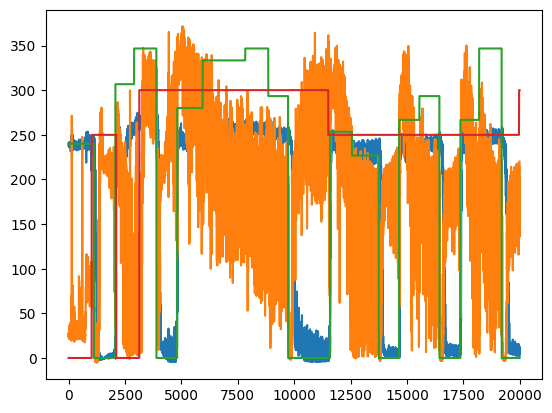

In [75]:
plt.plot(range(lp),predict)
plt.plot(range(lp),np.array(test_label)[:])

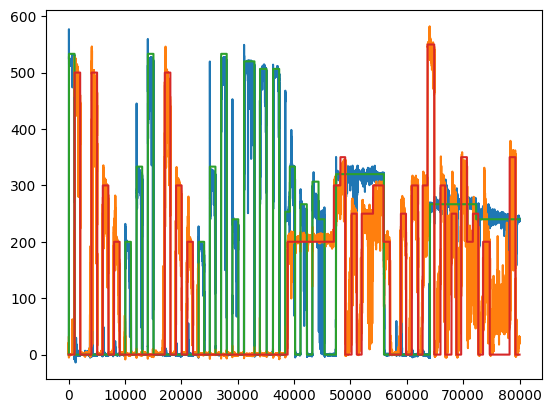

In [76]:
plt.plot(range(80000),predict2)
plt.plot(range(80000),np.array(train_label)[:])

In [ ]:
yp = pd.DataFrame(predict,columns=['pre_CO','pre_Eth'])

In [ ]:
yp

In [ ]:
yp = pd.concat([c,yp], axis=1)

In [ ]:
yp["dCO"] = yp["CO"] - yp["pre_CO"]

In [ ]:
yp["dEth"] = yp["Ethylene"] - yp["pre_Eth"]

In [ ]:
yp.to_csv("/content/drive/MyDrive/asd.csv")

In [ ]:
model.save('/content/drive/MyDrive/gassensor.h')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(d,c)
model.score(d,c)

0.8372878628644025

In [ ]:
predict = model.predict(d)